**Background**:  ESL Section 2.3.1 Senario 2.   

The two-dimensional data $X \in \mathbb{R}^2$ in each class are generated from a mixture of 10 different bivariate Gaussian distributions with uncorrelated components and different means, i.e.,  

$X \mid Y = k, Z = j \sim N(\mathbf{m}_{k,j}, s^2 \mathbf{I}_2)$  

where $k = 0, 1$, and $j = 1, 2, \ldots, 10$. Set  

$P(Y = k) = \frac{1}{2}, \quad P(Z = j) = \frac{1}{10}, \quad s^2 = \frac{1}{5}.$  

In other words, given $Y = k$, $X$ follows a mixture distribution with probability density function (PDF)  

$\frac{1}{10} \sum_{j=1}^{10} \left( \frac{1}{\sqrt{2\pi s^2}} \right)^2 e^{-\|\mathbf{x} - \mathbf{m}_{k,j}\|^2 / (2s^2)}.$


# Part 1: Generate Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## a) Generate 20 Centers from two-dimensional normal and randomly split into two classes of 10

In [ ]:
np.random.seed(7216)
csize = 10
p = 2
s = 1;      # sd for generating the centers within each class
m1 = np.random.normal(size = (csize, p)) * s \
     + np.concatenate([np.array([[1, 0]] * csize)])
m0 = np.random.normal(size = (csize, p)) * s \
     + np.concatenate([np.array([[0, 1]] * csize)])

## b) Generate 200 Training data & 10,000 Test data Around the 20 Centers

In [ ]:
np.random.seed(7216)
n = 100
# Randomly allocate the n samples for class 1  to the 10 clusters
id1 = np.random.randint(csize, size = n)
id0 = np.random.randint(csize, size = n)

# sd for generating data
s = np.sqrt(float(1)/5)

traindata = np.random.normal(size = (2 * n, p)) * s \
            + np.concatenate([m1[id1,:], m0[id0,:]])
ytrain = np.concatenate(([1]*n, [0]*n))




In [ ]:
np.random.seed(7216)
N = 5000
# Randomly allocate the n samples for class 1  to the 10 clusters
id2 = np.random.randint(csize, size = N)
id3 = np.random.randint(csize, size = N)

# sd for generating data
s = np.sqrt(float(1)/5)

testdata = np.random.normal(size = (2 * N, p)) * s \
            + np.concatenate([m1[id2,:], m0[id3,:]])
ytest = np.concatenate(([1] * N, [0] * N))

## c) Visualize Train Data

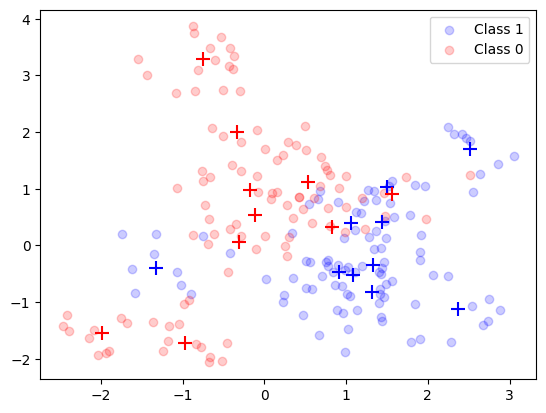

In [ ]:
plt.scatter(traindata[:n, 0], traindata[:n, 1], c = "blue", alpha=0.2, label='Class 1')
plt.scatter(traindata[n:, 0], traindata[n:, 1], c = "red", alpha=0.2, label='Class 0')

plt.scatter(m1[:,0], m1[:,1], marker = '+', s = 100, c = "blue")
plt.scatter(m0[:,0], m0[:,1], marker = '+', s = 100, c = "red")

plt.legend()
plt.show()

# Part 2: KNN

## a) Implement KNN from scratch

In [ ]:
import numpy as np

def myknn(train, test, K):
    def dists(train, test):
        x2 = np.sum(train**2, axis=1)  # shape of (m)
        y2 = np.sum(test**2, axis=1)  # shape of (n)
        xy = np.matmul(train, test.T)
        x2 = x2.reshape(-1, 1)
        d = np.sqrt(x2 - 2*xy + y2)  # shape of (m, n)
        return d

    # Compute the distance matrix
    d = dists(train, test)
    majority_vote=[]
    for i in range(d.shape[1]):
        # Get the indices of the K smallest distances in the i-th column
        v = ytrain[np.argsort(d[:, i])[:K]]
        v2 = 1 if sum(v) > len(v) / 2 else 0
        majority_vote.append(v2)

    return majority_vote

## b) How to handle ties



*   For Distance Tie: Because of argsort function, the first index is selected when there is distance tie.
*   For Vote Tie:  To prevent vote tie, use odd number of K.

  


## c) Test code and compare with built-in function

**k=1**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mypredict=myknn(traindata,testdata,1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(traindata, ytrain)
predictions = knn.predict(testdata)

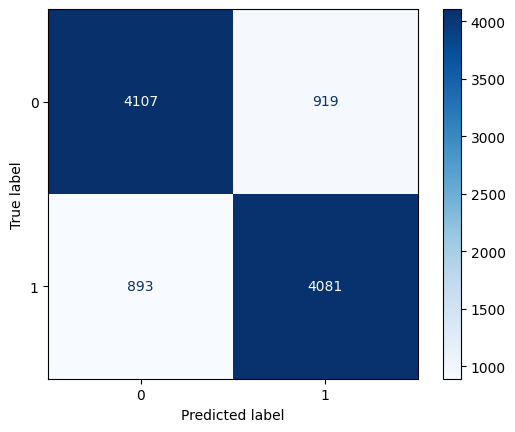

In [ ]:
cm = confusion_matrix(mypredict, ytest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

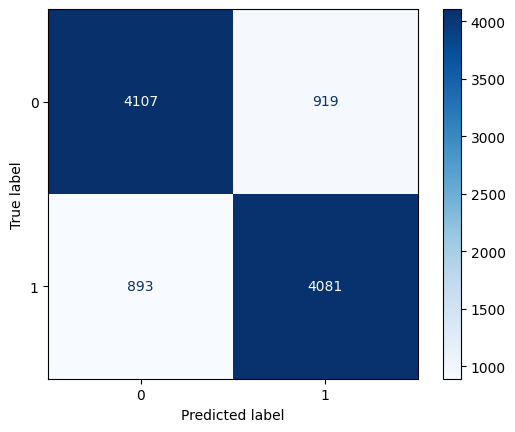

In [ ]:
cm = confusion_matrix(predictions, ytest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**k=3**

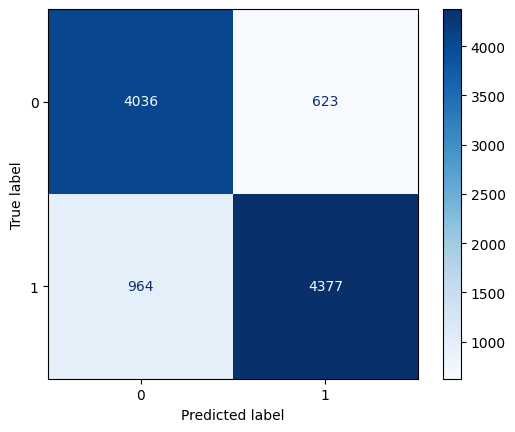

In [ ]:
mypredict=myknn(traindata,testdata,3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(traindata, ytrain)
predictions = knn.predict(testdata)
cm = confusion_matrix(mypredict, ytest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

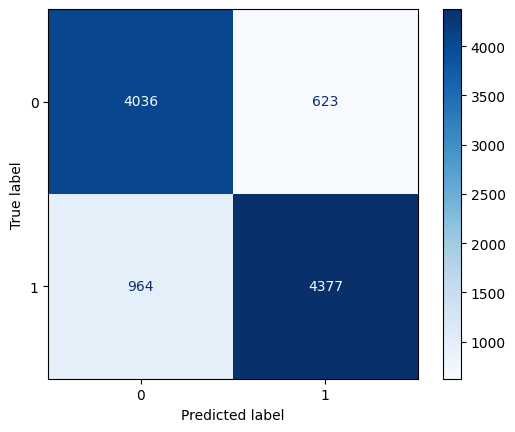

In [ ]:
cm = confusion_matrix(predictions, ytest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**k=5**

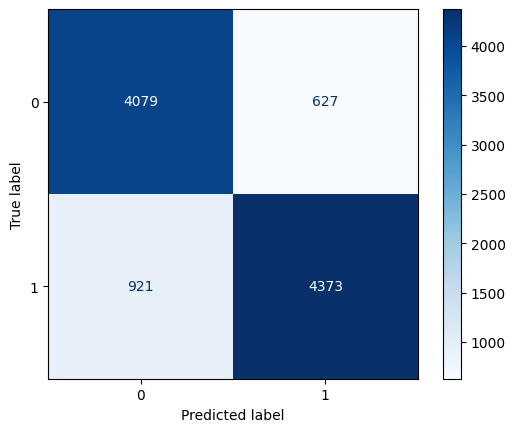

In [ ]:
mypredict=myknn(traindata,testdata,5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(traindata, ytrain)
predictions = knn.predict(testdata)
cm = confusion_matrix(mypredict, ytest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

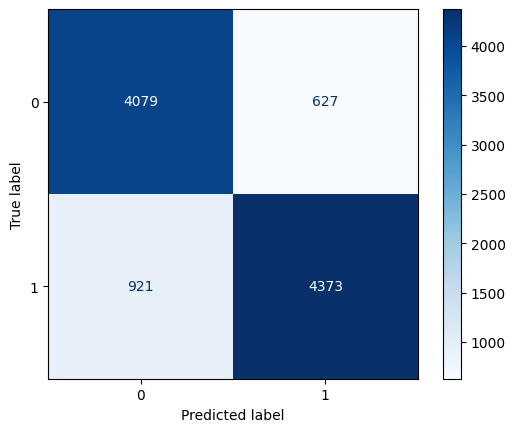

In [ ]:
cm = confusion_matrix(predictions, ytest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Part 3: cvKNN

## a) K chosen by 10 fold CV from scratch

In [ ]:
import numpy as np
np.random.seed(7216)
# Split 200 datasets into 10 groups
data = np.arange(0, 200)
np.random.shuffle(data)
groups = np.array_split(data, 10)

In [ ]:
#confirm the training data for cross validation
remaining_groups = [group for i, group in enumerate(groups) if i != 2]
remaining_groups = np.concatenate(remaining_groups)

In [ ]:
import statistics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#cross validation
cv_error_k_all = []
for k in range(1, 181):         #maximum k is 180 since we split original traindata into : train data 180 observations / test data 20 observations
  knn = KNeighborsClassifier(n_neighbors=k)  #repeat knn with differing k values
  cv_error_k=[]
  for j in range(0,10):
    remaining_groups = [group for i, group in enumerate(groups) if j != i]
    remaining_groups = np.concatenate(remaining_groups)
    knn.fit(traindata[remaining_groups],ytrain[remaining_groups]) #train data with 9 groups,
    cv_predict=knn.predict(traindata[groups[j]])  # test the fitted model with the remaining 1 group
    cm = confusion_matrix(cv_predict, ytrain[groups[j]]) #confusion matrix to verify the predictions
    cv_error=cm[0,1]+cm[1,0]  #find out the total mismatches with the predicted y values vs the actual y values from test data
    cv_error_k.append(cv_error)
    cv_error_k_mean = statistics.mean(cv_error_k) #the mean of the cv error is the cv error for the specified k
  cv_error_k_all.append(cv_error_k_mean) # add all the cv errors for each k into a list

In [ ]:
np.min(cv_error_k_all)

2

In [ ]:
np.max(np.where(cv_error_k_all == np.min(cv_error_k_all)))+1 # find the k with the smallest cv errors, and out of the k values find the biggest k

50

## b) Apply code on test data

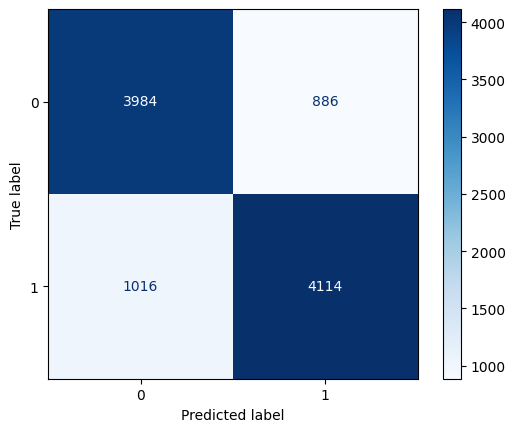

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(traindata, ytrain)
predictions = knn.predict(testdata)
cm = confusion_matrix(predictions, ytest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
test_error=(cm[0,1]+cm[1,0])/ len(ytest)
test_error

0.1902

# Part 4: Bayes rule

## a) Implement Bayes rule from scratch

d1 = ${\| x - m_{1l} \|^2}$  
d0 = ${\| x - m_{0l} \|^2}$  


L1 = $\sum_{l=1}^{10} \exp\left( - \frac{\| x - m_{1l} \|^2}{2s^2} \right)$  
L0 = $\sum_{l=1}^{10} \exp\left( - \frac{\| x - m_{0l} \|^2}{2s^2} \right)$  

In [ ]:
# Calculate Likelihood ratio L = L1/L0
def likelihood(test, m1, m0, s):
    # Calculate Distance from data points to each of the class
    def calc_dist(test, m):
      x2 = np.sum(test**2, axis=1)
      y2 = np.sum(m**2, axis=1)
      xy = np.matmul(test, m.T)
      x2 = x2.reshape(-1, 1)
      d = x2 - 2*xy + y2
      return d
    d0 = calc_dist(test, m0) # distance from all test data to class 0
    d1 = calc_dist(test, m1) # distance from all test data to class 1

    # Sum distance for 10 centers each
    L0 = np.sum(np.exp(-d0 / (2 * s**2)), axis=1)
    L1 = np.sum(np.exp(-d1 / (2 * s**2)), axis=1)

    return L1/L0 # return the likelihood

In [ ]:
# Bayes Classifier
L = likelihood(testdata, m1, m0, s)
y_pred = np.where(L>1, 1, 0) # if the likelihood is bigger than 1, y is 1

## b) Compare predicted value with real value

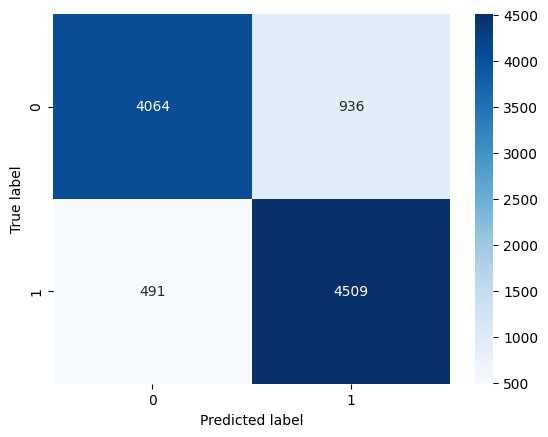

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, fmt="d", cmap="Blues", annot=True)

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Part 5: Simulation Study

## a) Graph: KNN vs cvKNN vs Bayesrule

In [ ]:
test_error_k7=[]
test_error_kcv=[]
bestk_all=[]
test_error_bayes=[]

for i in range(1,51):
    train_n = 100
    test_n = 5000

    # Train data
    id1_train = np.random.randint(csize, size=train_n)
    id0_train = np.random.randint(csize, size=train_n)

    s = np.sqrt(float(1)/5)

    traindata = np.random.normal(size=(2 * train_n, p)) * s \
                + np.concatenate([m1[id1_train, :], m0[id0_train, :]])
    ytrain = np.concatenate(([1] * train_n, [0] * train_n))

    # Test data
    id1_test = np.random.randint(csize, size=test_n)
    id0_test = np.random.randint(csize, size=test_n)

    testdata = np.random.normal(size=(2 * test_n, p)) * s \
              + np.concatenate([m1[id1_test, :], m0[id0_test, :]])
    ytest = np.concatenate(([1] * test_n, [0] * test_n))
    #K=7
    knn = KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(traindata, ytrain)
    predictions=knn.predict(testdata)
    cm = confusion_matrix(predictions, ytest)
    test_error=(cm[0,1]+cm[1,0])/len(ytest)
    test_error_k7.append(test_error)

    #cross validation
    cv_error_k_all = []
    for k in range(1, 181):
      knn = KNeighborsClassifier(n_neighbors=k)
      cv_error_k=[]
      for j in range(0,10):
        remaining_groups = [group for i, group in enumerate(groups) if j != i]
        remaining_groups = np.concatenate(remaining_groups)
        knn.fit(traindata[remaining_groups],ytrain[remaining_groups])
        cv_predict=knn.predict(traindata[groups[j]])
        cm = confusion_matrix(cv_predict, ytrain[groups[j]])
        cv_error=cm[0,1]+cm[1,0]
        cv_error_k.append(cv_error)
        cv_error_k_mean = statistics.mean(cv_error_k)
      cv_error_k_all.append(cv_error_k_mean)
    #record best ks
    bestk_k=np.max(np.where(cv_error_k_all == np.min(cv_error_k_all)))+1
    bestk_all.append(bestk_k)

    #K=CV
    knn = KNeighborsClassifier(n_neighbors=bestk_k)
    knn=knn.fit(traindata, ytrain)
    predictions=knn.predict(testdata)
    cm = confusion_matrix(predictions, ytest)
    test_error=(cm[0,1]+cm[1,0])/len(ytest)
    test_error_kcv.append(test_error)

    #Bayes rule
    L = likelihood(testdata, m1, m0, s)
    y_pred = np.where(L>1, 1, 0)
    cm = confusion_matrix(ytest, y_pred)
    test_error=(cm[0,1]+cm[1,0])/len(ytest)
    test_error_bayes.append(test_error)

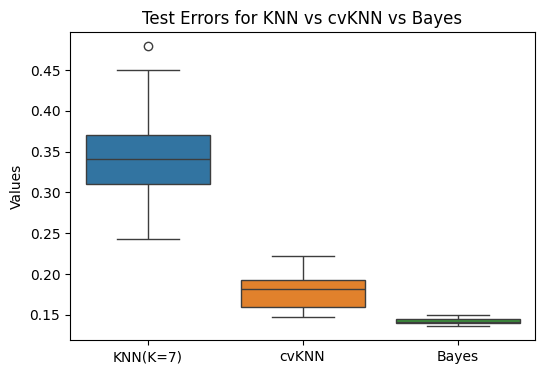

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(data=[test_error_k7, test_error_kcv, test_error_bayes])

# Customize plot
plt.xticks([0, 1, 2], ['KNN(K=7)', 'cvKNN','Bayes'])
plt.title('Test Errors for KNN vs cvKNN vs Bayes')
plt.ylabel('Values')
plt.show()

## b) Numerical Report of best 50 K values

In [ ]:
#numerical report of the 50 chosen K values
import pandas as pd
pd.DataFrame(bestk_all).describe()

,0
count,50.000000
mean,46.140000
std,33.992202
min,5.000000
25%,14.250000
50%,39.500000
75%,73.000000
max,114.000000


In [ ]:
!jupyter nbconvert --to html /C:\Users\Jaehoon Jung\Desktop\Jaehoon\542.ipynb

[NbConvertApp] WARNING | pattern '/C:UsersJaehoon' matched no files
[NbConvertApp] WARNING | pattern 'JungDesktopJaehoon542.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead